In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import random

In [2]:
df_0 = pd.read_pickle('process_events/pred_B0.pkl')
df_0.index = df_0.index.astype(int)

df_1 = pd.read_pickle('process_events/pred_B1.pkl')
df_1.index = df_1.index.astype(int)

df_2 = pd.read_pickle('process_events/pred_B2.pkl')
df_2.index = df_2.index.astype(int)

df_3 = pd.read_pickle('process_events/pred_B3.pkl')
df_3.index = df_3.index.astype(int)

df_5 = pd.read_pickle('process_events/pred_B5.pkl')
df_5.index = df_5.index.astype(int)

df_all = pd.concat([df_0, df_1, df_2, df_3, df_5], axis=0)
df_all.shape

(134547911, 8)

In [3]:
del df_0, df_1, df_2, df_3, df_5
gc.collect()

0

In [4]:
df_all['min_error'] = df_all[['error_m0', 'error_m1', 'error_m2', 'error_m3']].min(axis=1)
df_all.sort_values(by='min_error', ascending=True, inplace=True)
df_all = df_all['min_error']

In [5]:
df_all_df = df_all.reset_index(inplace=False)
del df_all
df_all_df.drop_duplicates(subset='event_id', keep='first', inplace=True)
df_all_df.set_index('event_id', inplace=True)

In [7]:
meta_df = pd.read_parquet('data/train_meta.parquet')[['event_id', 'batch_id']].set_index('event_id')

In [8]:
meta_df = meta_df.join(df_all_df)

<Axes: xlabel='batch_id'>

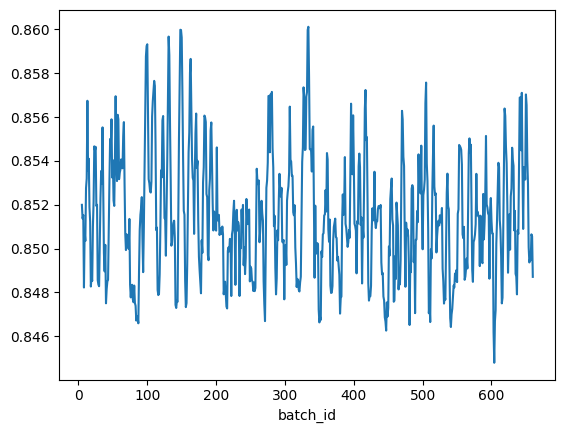

In [18]:
meta_df.groupby('batch_id')['min_error'].mean().rolling(5).mean().plot()

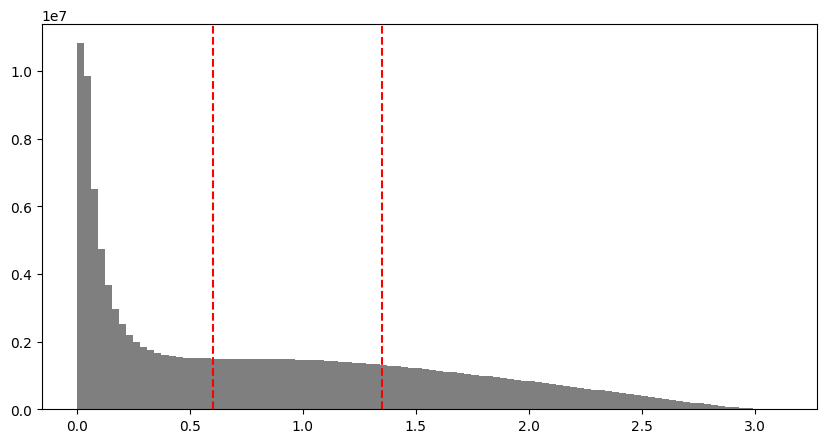

In [19]:
plt.figure(figsize=(10, 5))

plt.hist(df_all_df['min_error'], bins=100, color='black', alpha=0.5)
plt.axvline(x=0.6, color='red', linestyle='--')
plt.axvline(x=1.35, color='red', linestyle='--')
plt.show()

In [20]:
L = 0.6
V = 1.35
df_all_df[df_all_df.min_error <= L].shape, df_all_df[(df_all_df.min_error > L) & (df_all_df.min_error <= V)].shape, df_all_df[df_all_df.min_error > V].shape

((61665382, 1), (34770148, 1), (35518394, 1))

In [21]:
P01 = df_all_df[df_all_df.min_error <= L]
P0 = P01[:int(P01.shape[0]//2)]
P1 = P01[int(P01.shape[0]//2):]
P2 = df_all_df[(df_all_df.min_error > L) & (df_all_df.min_error <= V)]
P3 = df_all_df[df_all_df.min_error > V]

P0.shape, P1.shape, P2.shape, P3.shape

((30832691, 1), (30832691, 1), (34770148, 1), (35518394, 1))

In [22]:
P0_list = sorted(list(set(P0.index.to_list())))
P1_list = sorted(list(set(P1.index.to_list())))
P2_list = sorted(list(set(P2.index.to_list())))
P3_list = sorted(list(set(P3.index.to_list())))

In [23]:
len(P0_list), len(P1_list), len(P2_list), len(P3_list)

(30832691, 30832691, 34770148, 35518394)

In [24]:
len(P0_list) + len(P1_list) + len(P2_list) + len(P3_list)

131953924

In [25]:
focus_dict = {
    'f0': P0_list,
    'f1': P1_list,
    'f2': P2_list,
    'f3': P3_list
}

import pickle
with open('focus_dict.pkl', 'wb') as f:
    pickle.dump(focus_dict, f)